## Fuel Economy Predictor

This project aims to predict the fuel economy of cars produced in the 1970s and the 1980s. The metric for measuring is miles per gallon and will be the target variable.

The data contains 7 independent variables - Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year and Origin.

There are 3 origin values - 1 is USA, 2 is Europe, 3 is Japan

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Step 1. Load Data

The data was made available on the Maven Analytics platform for practice and projects.

In [2]:
# load csv to pandas dataframe
fuel_eco = pd.read_csv("auto-mpg.csv")

In [3]:
# inspect the data
fuel_eco.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
print(f"The dataset contains {fuel_eco.shape[0]} rows and {fuel_eco.shape[1]} columns") 

The dataset contains 398 rows and 9 columns


## Step 2. Train Test Split

Since the analysis involves understanding how origin affects the fuel economy, it is important that the sample contains a representative number of records with each Origin. As the records with origin of Japan and Europe are far less than USA, stratified sampling should be used to make sure cars from Japan and Europe are also represented well in the trainig set.

The data will be split into train and test data in a 80/20 split. 

In [5]:
# splitting into train and test data using sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(fuel_eco, test_size=0.2, random_state=7, stratify=fuel_eco["origin"])
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

318 train and 80 test instances


Following the division of training and testing data, data exploration will only be conducted on the training data as the testing data should remain untouched.

## Step 3. Exploratory Data Analysis

In [6]:
# descriptive statistics of the numerical values
train_set[['mpg','displacement','weight','acceleration','horsepower']].describe()

,mpg,displacement,weight,acceleration
count,318.000000,318.000000,318.000000,318.000000
mean,23.619497,193.581761,2955.751572,15.481447
std,7.818678,104.715107,846.865945,2.755540
min,9.000000,70.000000,1613.000000,8.000000
25%,17.500000,104.250000,2220.750000,13.525000
50%,23.000000,151.000000,2764.500000,15.500000
75%,29.000000,260.000000,3594.500000,17.000000
max,46.600000,455.000000,5140.000000,24.800000


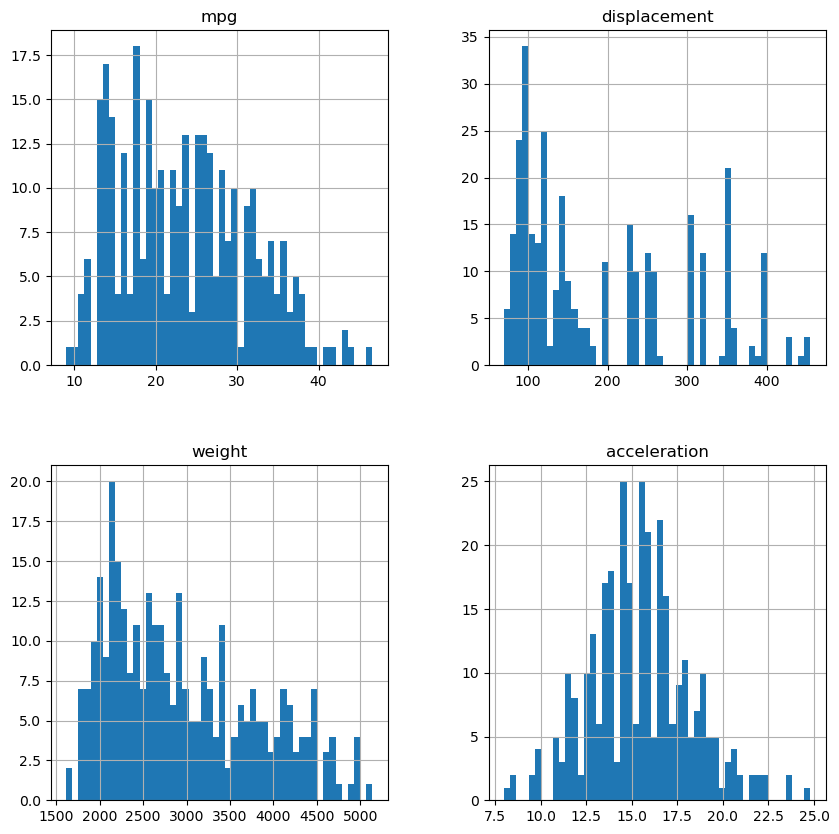

In [7]:
# checking the distribution of the numerical data
sample_distribution = train_set[['mpg','displacement','weight','acceleration','horsepower']].hist(bins=50, figsize=(10,10))

The distribution for the cars' mpg, displacement and weight is slightly skewed to the right. Acceleration is fairly normally distributed. 

In [8]:
# correlation of the target variable to independent variables
corr = train_set.corr()
corr['mpg'].sort_values(ascending=False)

C:\Users\HAL9K\AppData\Local\Temp\ipykernel_2660\1295251609.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_set.corr()


mpg             1.000000
model year      0.586566
origin          0.549565
acceleration    0.438383
cylinders      -0.787635
displacement   -0.814460
weight         -0.836101
Name: mpg, dtype: float64

The correlation analysis shows that displacement and weight have high inverse correlation to the target variable. 

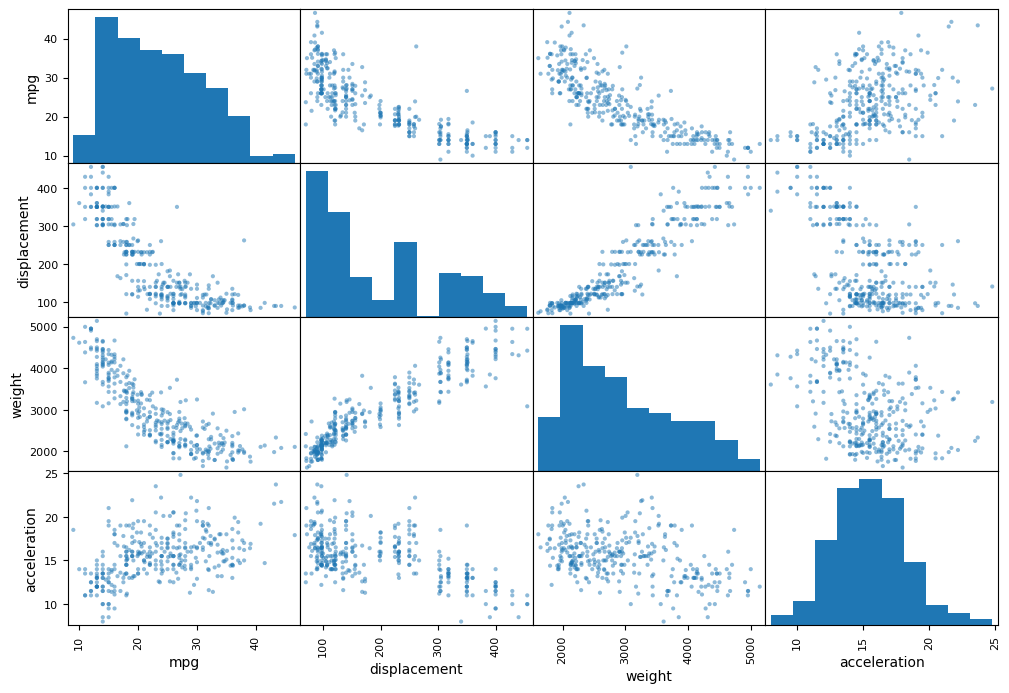

In [9]:
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
attributes = ["mpg", "displacement", "weight","acceleration","horsepower"]
scatter = scatter_matrix(train_set[attributes], figsize=(12, 8))

In [10]:
# finding the trend of average mpg over the years
avgmpg_year = train_set.groupby('model year')['mpg'].mean().reset_index()

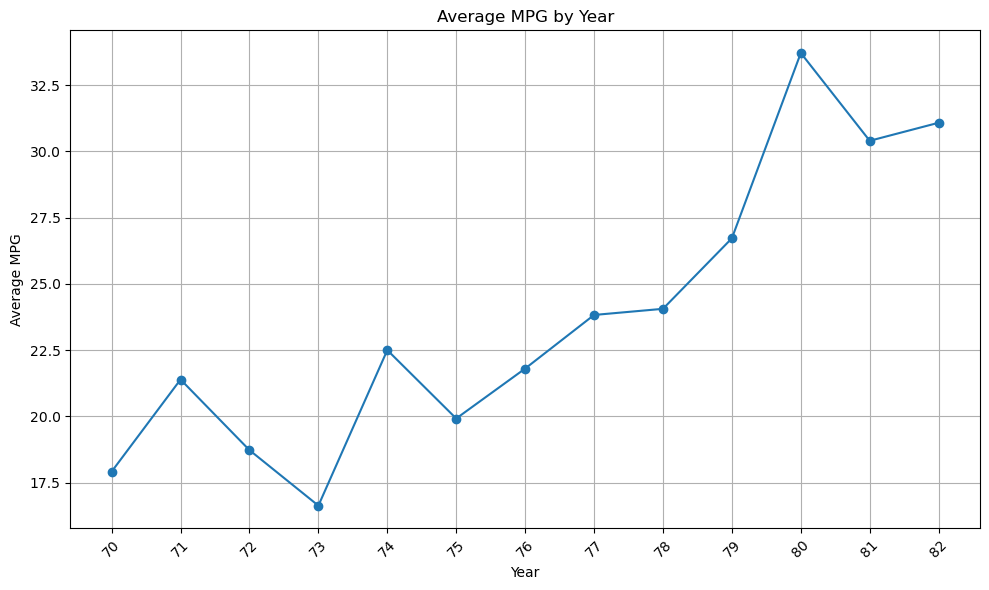

In [11]:
# plotting the above data
plt.figure(figsize=(10, 6))
plt.plot(avgmpg_year['model year'], avgmpg_year['mpg'], marker='o', linestyle='-')
plt.title('Average MPG by Year')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.xticks(avgmpg_year['model year'], rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The average MPG has drastically increased over the years, meaning cars manufactured in 1980-82 likely to be much more fuel efficient compared to cars from 1970-72. As the average was around 20 MPG in the early 1970s and cars manufactured in the early 1980s have an average MPG of over 30.

In [12]:
# finding the trend of average mpg for origin
avgmpg_origin = train_set.groupby('origin')['mpg'].mean().reset_index()

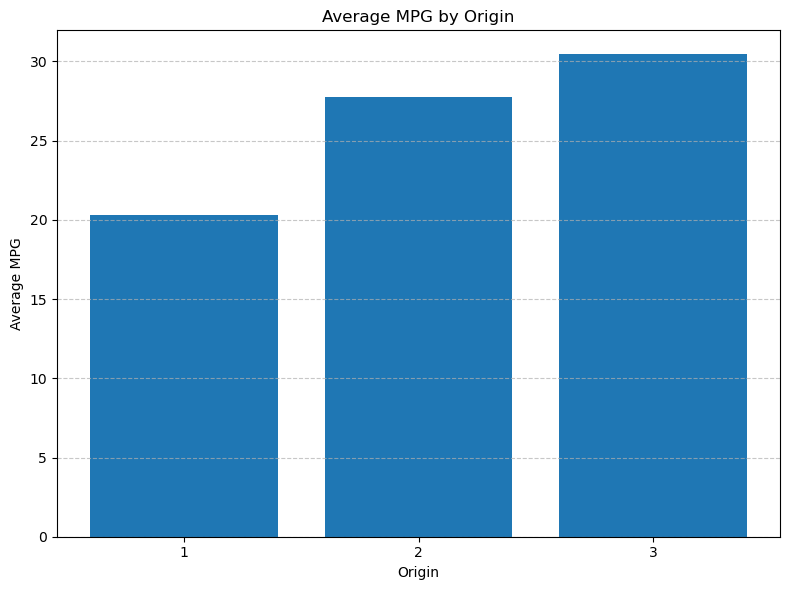

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(avgmpg_origin['origin'], avgmpg_origin['mpg'])
plt.title('Average MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('Average MPG')
plt.xticks(avgmpg_origin['origin'])  # Set x-axis tick labels to origins
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Origin also has a major effect as the Japanese cars have an average MPG of 30, while the American cars have an average MPG of 20. European cars have an average MPG of around 27.

## Step 4. Data Preprocessing

Origin is a categorical variable and USA, Europe and Japan have been encoded to it as 1, 2 and 3 respectively.

Cylinders is a discrete variable and hence will be treated as categorical data.

Model Year is also a discrete variable but as years have a direct relationship, we shall treat it as continuous data. 

In [14]:
# inspecting the data
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 264 to 213
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           318 non-null    float64
 1   cylinders     318 non-null    int64  
 2   displacement  318 non-null    float64
 3   horsepower    318 non-null    object 
 4   weight        318 non-null    int64  
 5   acceleration  318 non-null    float64
 6   model year    318 non-null    int64  
 7   origin        318 non-null    int64  
 8   car name      318 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 24.8+ KB


In [15]:
# we dont need car names so will drop that column
del train_set['car name']
del test_set['car name']

In [16]:
# changing horsepower to numerical data as it is not a categorical value

train_set['horsepower'] = pd.to_numeric(train_set['horsepower'], errors='coerce', downcast='integer')
test_set['horsepower'] = pd.to_numeric(test_set['horsepower'], errors='coerce', downcast='integer')

In [17]:
# replacing encoded origin values with their real values as 1,2,3 makes it look like the ordinal data
# define a dictionary mapping encoded values to real values
encoding_map = {1: 'USA', 2: 'Europe', 3: 'Japan'}

# apply the mapping to both the training and test sets
train_set['origin'] = train_set['origin'].replace(encoding_map)
test_set['origin'] = test_set['origin'].replace(encoding_map)

In [18]:
# checking for missing values
train_set.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      3
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer

# initiate imputer
imputer = SimpleImputer(strategy="median")

# split the data into categorical and numerical features
trainset_cats = train_set[['origin']]
trainset_nums = train_set.drop(columns=['origin'])

# impute missing values in numerical features
imputer.fit(trainset_nums)
imputed_trainset_nums = imputer.transform(trainset_nums)

In [20]:
# fitting and transforming the isolated data and storing it
transformed = imputer.fit_transform(trainset_nums)

In [21]:
train_set = pd.DataFrame(transformed, columns=trainset_nums.columns)

# add the categorical variable back
train_set['origin'] = trainset_cats['origin'].values


In [22]:
# check if there are missing values again
train_set.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [23]:
# fitting the imputer to the test set
testset_cats = test_set[['origin']]
testset_nums = test_set.drop(columns=['origin'])

transformed = imputer.transform(testset_nums)

test_set = pd.DataFrame(transformed, columns=testset_nums.columns)

# add the categorical variable back
test_set['origin'] = testset_cats['origin'].values

In [24]:
# check if there are missing values again
test_set.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

### Creating Dummy Variables

In [25]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(drop="first", sparse=False)

# categorical columns to transform
cat_cols = ['origin','cylinders']

# fit an encoder and transform the **trainset**
cat_vals = train_set[cat_cols].to_numpy()
transformed = one_hot_encoder.fit_transform(cat_vals)

# the names of the new columns are the unique values of "ocean_proximity"
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)

# put the transformed data as columns in the trainset dataframe
for i, new_col_name in enumerate(new_col_names):
    train_set[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the trainset
train_set.head()

C:\Users\HAL9K\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_Japan,origin_USA,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0
0,18.1,8.0,302.0,139.0,3205.0,11.2,78.0,USA,0.0,1.0,0.0,0.0,0.0,1.0
1,29.0,4.0,90.0,70.0,1937.0,14.0,75.0,Europe,0.0,0.0,1.0,0.0,0.0,0.0
2,15.5,8.0,400.0,190.0,4325.0,12.2,77.0,USA,0.0,1.0,0.0,0.0,0.0,1.0
3,16.0,8.0,400.0,230.0,4278.0,9.5,73.0,USA,0.0,1.0,0.0,0.0,0.0,1.0
4,25.5,4.0,140.0,89.0,2755.0,15.8,77.0,USA,0.0,1.0,1.0,0.0,0.0,0.0


In [26]:
# transform the **testset** using the encoder fitted on trainset
cat_vals = test_set[cat_cols].to_numpy()
transformed = one_hot_encoder.transform(cat_vals)

# put the transformed data as columns in the testset dataframe
for i, new_col_name in enumerate(new_col_names):
    test_set[new_col_name] = transformed[:,i]
    
# check if the dummies are produced correctly in the testset
test_set.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_Japan,origin_USA,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0
0,16.0,8.0,318.0,150.0,4498.0,14.5,75.0,USA,0.0,1.0,0.0,0.0,0.0,1.0
1,15.0,8.0,318.0,150.0,3399.0,11.0,73.0,USA,0.0,1.0,0.0,0.0,0.0,1.0
2,34.0,4.0,108.0,70.0,2245.0,16.9,82.0,Japan,1.0,0.0,1.0,0.0,0.0,0.0
3,30.5,4.0,97.0,78.0,2190.0,14.1,77.0,Europe,0.0,0.0,1.0,0.0,0.0,0.0
4,13.0,8.0,440.0,215.0,4735.0,11.0,73.0,USA,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
# removing the original categorical columns
train_set.drop(columns=['origin', 'cylinders'], inplace=True)
test_set.drop(columns=['origin', 'cylinders'], inplace=True)

### Feature Scaling 

In [28]:
# implementing feature scaling on the data
from sklearn.preprocessing import StandardScaler

# initiate the scaler
scaler = StandardScaler()

# isolate the target variable
trainset_target = train_set["mpg"].values
trainset_predictors = train_set.drop("mpg", axis=1)

# fitting the scaler and transforming the trainingset and then putting the array back into the dataframe
scaled_vals = scaler.fit_transform(trainset_predictors)
train_set = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# put the non-scaled target back in
train_set['mpg'] = trainset_target

# inspect the data
train_set.head()

,displacement,horsepower,weight,acceleration,model year,origin_Japan,origin_USA,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0,mpg
0,1.036996,0.898595,0.294782,-1.556209,0.530920,-0.49705,0.773298,-1.031957,-0.09759,-0.516655,1.710534,18.1
1,-0.990736,-0.891253,-1.204863,-0.538472,-0.273044,-0.49705,-1.293162,0.969033,-0.09759,-0.516655,-0.584613,29.0
2,1.974343,2.221526,1.619390,-1.192731,0.262932,-0.49705,0.773298,-1.031957,-0.09759,-0.516655,1.710534,15.5
3,1.974343,3.259119,1.563804,-2.174120,-0.809020,-0.49705,0.773298,-1.031957,-0.09759,-0.516655,1.710534,16.0
4,-0.512497,-0.398397,-0.237426,0.115787,0.262932,-0.49705,0.773298,0.969033,-0.09759,-0.516655,-0.584613,25.5


In [29]:
# repeating the steps for test data
# isolate the target variable
testset_target = test_set["mpg"].values
testset_predictors = test_set.drop("mpg", axis=1)

# transforming the testingset and then putting the array back into the dataframe
scaled_vals = scaler.fit_transform(testset_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled target back in
test_set['mpg'] = testset_target

# inspect the data
test_set.head()

,displacement,horsepower,weight,acceleration,model year,origin_Japan,origin_USA,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0,mpg
0,1.221592,1.254945,1.740347,-0.515657,-0.275779,-0.5,0.774597,-1.0,0.0,-0.519462,1.623688,16.0
1,1.221592,1.254945,0.438566,-1.793392,-0.841478,-0.5,0.774597,-1.0,0.0,-0.519462,1.623688,15.0
2,-0.827506,-0.926383,-0.928363,0.360504,1.704170,2.0,-1.290994,1.0,0.0,-0.519462,-0.615882,34.0
3,-0.934840,-0.708250,-0.993511,-0.661684,0.289921,-0.5,-1.290994,1.0,0.0,-0.519462,-0.615882,30.5
4,2.412021,3.027274,2.021077,-1.793392,-0.841478,-0.5,0.774597,-1.0,0.0,-0.519462,1.623688,13.0


## Step 5. Training Data

In [30]:
# defining Xtrain as the independent variables
Xtrain = train_set.drop("mpg", axis=1)

# ytrain is the target variable
ytrain = train_set["mpg"].copy()

### Baseline Model

In [31]:
# defining mean of mpg as a baseline prediction
mean_mpg = ytrain.mean()
mean_mpg

23.61949685534591

In [32]:
# measuring the rmse of the baseline model
from sklearn.metrics import mean_squared_error

# yhat will have the same number of rows as ytrain, 
# each cell will be filled with the same value, mean_mpg
yhat = np.full((ytrain.shape[0], 1), mean_mpg)

baseline_mse = mean_squared_error(ytrain, yhat)

# take square root
baseline_rmse = np.sqrt(baseline_mse)

baseline_rmse

7.80637522070699

With a score of 23.61, the mean of MPG is used as a baseline. The baseline model is off by 7.88 MPG on average. 

### Linear Regression

In [33]:
# conducting linear regression on this model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [34]:
# R2 score of this model
lin_reg.score(Xtrain, ytrain)

0.8470798543407076

In [35]:
# finding rmse 
yhat = lin_reg.predict(Xtrain)

lin_mse = mean_squared_error(ytrain, yhat)

# take square root
lin_rmse = np.sqrt(lin_mse)

lin_rmse

3.0526834608433098

Linear Regression is clearly better than the baseline model as it has an RMSE of only 3.27 MPG.

Since the data is not very complex, even a simple Regression model performs well. Let's plot the predictions with the training data to compare them visually.

<Axes: >

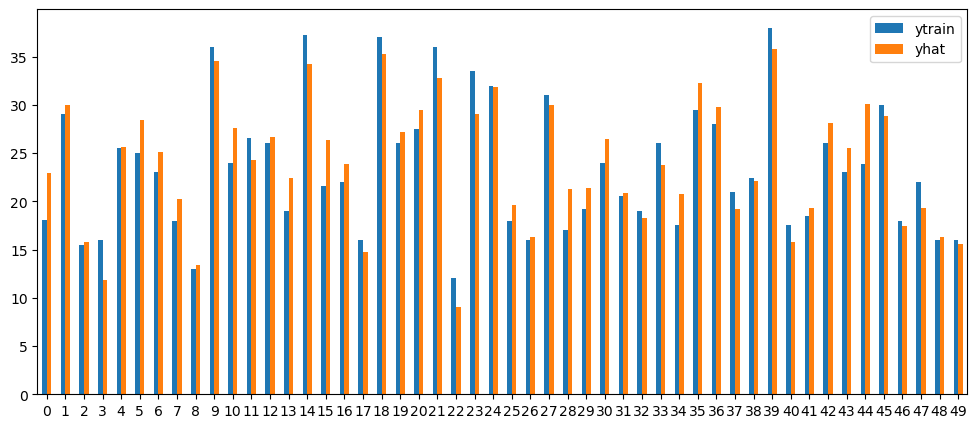

In [36]:
#checking the overfitting/underfitting
# create a temporary dataframe containing two columns
df_reg = pd.DataFrame({"ytrain": ytrain[:50], "yhat": yhat[:50]})

# plot the dataframe
df_reg.plot(figsize=(12,5), kind="bar", rot=0)

The barplot shows that the prediction values are close to the training values but never does the model display overfitting.

### Decision Trees

A decision tree can be a powerful model for this problem. 

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(Xtrain, ytrain)
ypred = tree_reg.predict(Xtrain)
tree_mse = mean_squared_error(ytrain, ypred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This model has no errors, a clear sign of overfitting. Let's view it visually

<Axes: >

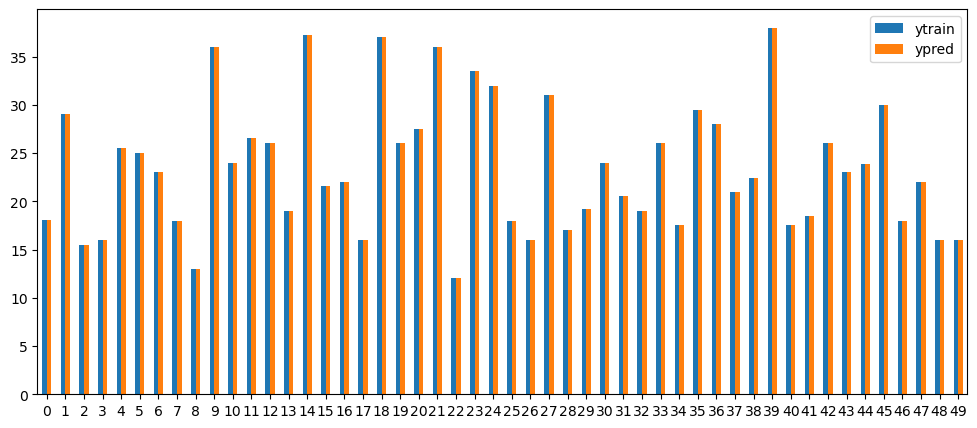

In [38]:
# create a temporary dataframe containing two columns
df_dec = pd.DataFrame({"ytrain": ytrain[:50], "ypred": ypred[:50]})

# plot the dataframe
df_dec.plot(figsize=(12,5), kind="bar", rot=0)

Each of the 50 records show clear overfitting which means that the Decision Tree model will not be able to generalise the predictions and perform poorly on the testing data.

## Step. 6 Testing Data

In [39]:
# defining Xtest as the independent variables
Xtest = test_set.drop("mpg", axis=1)

# ytest is the target variable
ytest = test_set["mpg"].copy()

In [40]:
# conducting linear regression on the testing data
lin_reg = LinearRegression()

lin_reg.fit(Xtest, ytest)

LinearRegression()

In [41]:
# R2 score of this model
lin_reg.score(Xtest, ytest)

0.8518477464185344

In [42]:
# finding rmse 
yhat = lin_reg.predict(Xtest)

lin_mse = mean_squared_error(ytest, yhat)

# take square root
lin_rmse = np.sqrt(lin_mse)

lin_rmse

2.998930080497256

With an R2 score of 0.85 and RMSE of 2.99, the Linear Regression model has performed as expected on the testing data. In fact the model has performed marginally better on the testing data and can be used to predict the Fuel Economy of cars.

#### Answering Questions for Analysis

Q1. What is the overall trend in fuel economy over time?

Fuel has improved over time. The chart below shows how the fuel economy across all 3 origins has improved over time. 

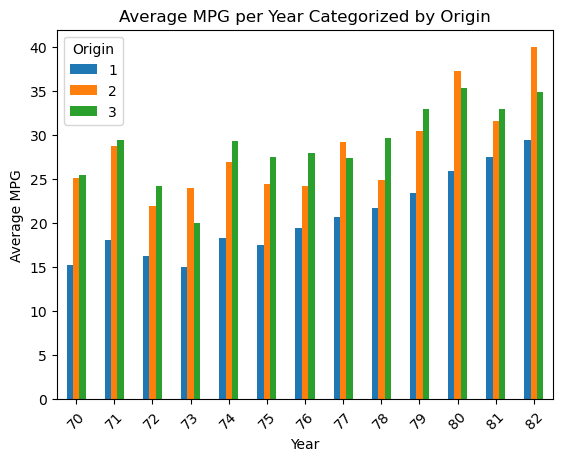

In [46]:
# Calculating average mpg per year and origin
averages = fuel_eco.groupby(['model year', 'origin'])['mpg'].mean().unstack()

# Plotting
averages.plot(kind='bar', stacked=False)
plt.title('Average MPG per Year Categorized by Origin')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.legend(title='Origin')
plt.xticks(rotation=45)
plt.show()


Q2. Which automobile characteristic is most correlated to fuel economy?

In [47]:
corr

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.787635,-0.814460,-0.836101,0.438383,0.586566,0.549565
cylinders,-0.787635,1.000000,0.950677,0.891647,-0.519836,-0.374373,-0.559751
displacement,-0.814460,0.950677,1.000000,0.930843,-0.555675,-0.393712,-0.606196
weight,-0.836101,0.891647,0.930843,1.000000,-0.424376,-0.325590,-0.575321
acceleration,0.438383,-0.519836,-0.555675,-0.424376,1.000000,0.297832,0.225822
model year,0.586566,-0.374373,-0.393712,-0.325590,0.297832,1.000000,0.170063
origin,0.549565,-0.559751,-0.606196,-0.575321,0.225822,0.170063,1.000000


Cylinders, Displacement and Weight are the characterstics with the highest correlation with fuel economy (mpg)

Q3. Is there a difference in fuel economy by the origin of the car produced? If so, is there an underlying difference in the types of cars manufactured in each?

In [55]:
origin_average = fuel_eco.groupby('origin')['mpg','cylinders','displacement','weight'].mean().reset_index()
origin_average

C:\Users\HAL9K\AppData\Local\Temp\ipykernel_2660\2102198699.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  origin_average = fuel_eco.groupby('origin')['mpg','cylinders','displacement','weight'].mean().reset_index()


,origin,mpg,cylinders,displacement,weight
0,1,20.083534,6.248996,245.901606,3361.931727
1,2,27.891429,4.157143,109.142857,2423.300000
2,3,30.450633,4.101266,102.708861,2221.227848


With Origin 1 being USA it is clear how cars manufactured there differ from those manufactured in Europe and Japan. American cars average more than 6 cylinders while Europian and Japanese ones average only 4 cylinders. Accordingly American cars have an average displacement of 245cc while the others are just over 100cc. And American cars weigh almost 1000kgs more than their counterparts in Europe and Japan. 

This displays why the fuel economy in USA is much low than that in Europe and Japan.